# Mobile Money Fraud Transaction Detection System

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
#pip install seaborn

In [30]:
df = pd.read_csv('mobile_money_transactions.csv')
df.head()

,transaction_id,user_id,transaction_type,amount,device_id,location,timestamp,channel,agent_id,sim_swap_flag,balance_before,balance_after,hour_of_day,day_of_week,transaction_velocity
0,T000000,U0874,receive,5157.60,D082,Yaba,2024-03-25 16:38:00,USSD,A035,0,77090.73,71933.13000,16,0,0
1,T000001,U0460,receive,2501.95,D196,Ajah,2024-04-11 23:47:00,USSD,A069,0,25595.31,23093.36000,23,3,1
2,T000002,U0253,send,3727.93,D180,Ikeja,2024-04-01 14:52:00,USSD,A194,0,68411.20,64683.27000,14,0,4
3,T000003,U0526,receive,4044.79,D096,Owerri,2024-03-13 00:14:00,USSD,A297,0,13859.25,9814.46000,0,2,0
4,T000004,U0752,receive,2523.75,D175,Yaba,2024-06-28 23:38:00,Agent,A050,0,2497.58,481.97505,23,4,2


##

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   transaction_id           10000 non-null  object 
 2   user_id                  10000 non-null  object 
 3   transaction_type         10000 non-null  object 
 4   amount                   10000 non-null  float64
 5   location                 10000 non-null  object 
 6   device_type              10000 non-null  object 
 7   network_provider         10000 non-null  object 
 8   user_type                10000 non-null  object 
 9   time_of_day              10000 non-null  object 
 10  is_foreign_number        10000 non-null  int64  
 11  is_sim_recently_swapped  10000 non-null  int64  
 12  has_multiple_accounts    10000 non-null  int64  
 13  datetime                 10000 non-null  object 
dtypes: float64(1), int64(4)

In [5]:
df.columns

Index(['Unnamed: 0', 'transaction_id', 'user_id', 'transaction_type', 'amount',
       'location', 'device_type', 'network_provider', 'user_type',
       'time_of_day', 'is_foreign_number', 'is_sim_recently_swapped',
       'has_multiple_accounts', 'datetime'],
      dtype='object')

In [6]:
#dropping the Unnamed: 0 column, transaction_id and user_id
df.drop(columns=['transaction_id','Unnamed: 0','user_id'], inplace=True)

In [18]:
#checking for missing values
df.isnull().sum()

transaction_type           0
amount                     0
location                   0
device_type                0
network_provider           0
user_type                  0
time_of_day                0
is_foreign_number          0
is_sim_recently_swapped    0
has_multiple_accounts      0
datetime                   0
dtype: int64

In [20]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

In [7]:
#visualizing the amount
fig = px.histogram(df, x='amount', nbins=50, title='Histogram of the amount',
                labels={'Values':'Amount Distribution', 'count': 'Frequency'})
fig.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_type         10000 non-null  object 
 1   amount                   10000 non-null  float64
 2   location                 10000 non-null  object 
 3   device_type              10000 non-null  object 
 4   network_provider         10000 non-null  object 
 5   user_type                10000 non-null  object 
 6   time_of_day              10000 non-null  object 
 7   is_foreign_number        10000 non-null  int64  
 8   is_sim_recently_swapped  10000 non-null  int64  
 9   has_multiple_accounts    10000 non-null  int64  
 10  datetime                 10000 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 859.5+ KB


In [17]:
#visualizing the object datatype columns
for col in df.select_dtypes(include=['object']).columns[:-2]:
    print(df[col].value_counts())
    fig = px.bar(df, x=col, 
                 title=f'Bar Chart of {col}', color=col,
                 labels={'Category': col , 'Values': 'Count', 'Subcategory' :'Subcategory Type'})

    fig.show()

transaction_type
Buy Airtime       1715
Deposit Cash      1694
Send Money        1682
Lipa na M-Pesa    1651
Withdraw Cash     1645
Pay Bill          1613
Name: count, dtype: int64


location
Garissa     1056
Meru        1052
Eldoret     1039
Nyeri       1028
Thika       1025
Machakos     984
Mombasa      972
Nakuru       964
Nairobi      951
Kisumu       929
Name: count, dtype: int64


device_type
iOS              3351
Feature Phone    3342
Android          3307
Name: count, dtype: int64


network_provider
Safaricom       3373
Airtel          3340
Telkom Kenya    3287
Name: count, dtype: int64


user_type
individual    8497
agent         1503
Name: count, dtype: int64


In [10]:
#pip install -U nbformat

In [32]:
#pip install nbformat notebook ipywidgets ipykernel

is_foreign_number
0    9671
1     329
Name: count, dtype: int64


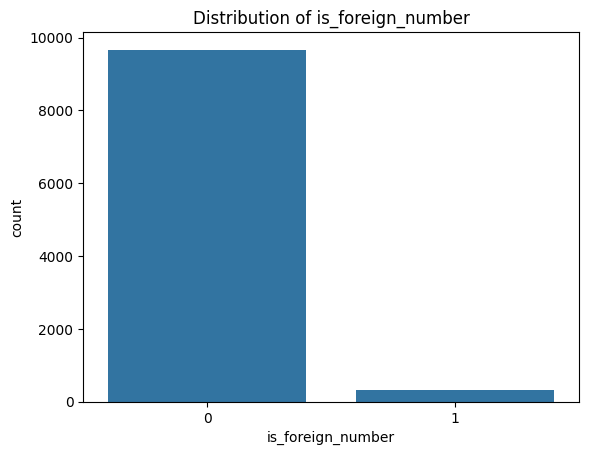

is_sim_recently_swapped
0    9482
1     518
Name: count, dtype: int64


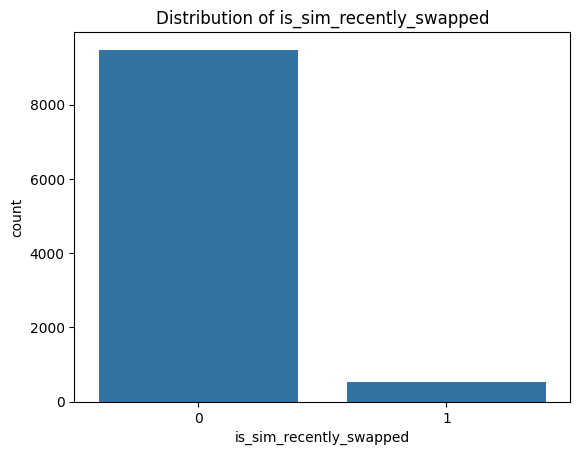

has_multiple_accounts
0    9039
1     961
Name: count, dtype: int64


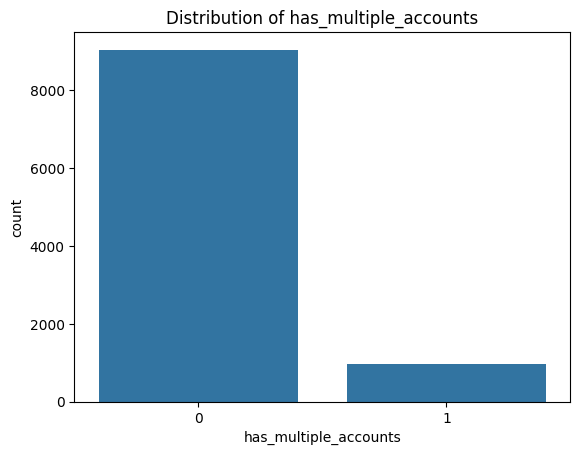

In [13]:
for col in df.select_dtypes(include='int').columns:
    print(df[col].value_counts())
    sns.countplot(df, x=col)
    plt.xlabel(f'{col}')
    plt.ylabel('count')
    plt.title(f'Distribution of {col}')
    plt.show()

In [21]:
df['datetime'].head()

0    2024-06-16 21:45:13
1    2024-06-05 00:49:25
2    2024-06-13 15:54:02
3    2024-06-10 01:05:49
4    2024-06-27 02:28:53
Name: datetime, dtype: object

In [27]:
#converting the datetime column to datatime datatype
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
#engineering the 